## Import Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
import plotly.express as px
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import Raw Data

In [12]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\DA projects\e commerce\ecommerce.csv", encoding = 'latin1')

## Sample Data

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Data Size

In [97]:
print('Nmber of Rows: ', df.shape[0])
print('Nmber of Columns: ', df.shape[1])

Nmber of Rows:  9994
Nmber of Columns:  24


## Data Cleaning

### Checking Datatype

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Standardizing Data

In [16]:
# changing the datatype for order date and ship date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Extracting and adding month, year and day columns from order date to the table

In [21]:
df['Order Month'] = df['Order Date'].dt.strftime('%B')
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.strftime('%A')

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,Sunday


### Checking for Null Values

In [42]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Month      0
Order Year       0
Order Day        0
dtype: int64

## Exploratory Data Analysis

### KPI's Requirement

In [23]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# Number of Items Sold
no_of_items = df['Quantity'].sum()

# Total Profit
total_profit  = df['Profit'].sum()

# Display
print(f"Total Sales: ${total_sales:,.1f}")

print(f"Avg Sales:   ${avg_sales:,.1f}")

print(f"No of Items Sold: {no_of_items:,}")

print(f"Total Profit:  ${total_profit:,.1f}")

Total Sales: $2,297,200.9
Avg Sales:   $229.9
No of Items Sold: 37,873
Total Profit:  $286,397.0


## Feature Engineering

### Sales by Month

In [64]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().round(2).reset_index()

monthly_sales


,Order Month,Sales
0,April,137762.13
1,August,159044.06
2,December,325293.50
3,February,59751.25
4,January,94924.84
5,July,147238.10
6,June,152718.68
7,March,205005.49
8,May,155028.81
9,November,352461.07


### Items Sold by Category

In [32]:
category_sales = df.groupby('Category')['Quantity'].sum().round(2).reset_index()

category_sales

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


### Items Ordered by Month

In [73]:
items_by_month = df.groupby('Order Month')['Quantity'].sum().round(2).reset_index()
items_by_month

,Order Month,Quantity
0,April,2447
1,August,2784
2,December,5419
3,February,1067
4,January,1475
5,July,2705
6,June,2680
7,March,2564
8,May,2791
9,November,5775


### Sales by Sub-Category

In [27]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().round(2).reset_index()

subcat_sales

,Sub-Category,Sales
0,Accessories,167380.32
1,Appliances,107532.16
2,Art,27118.79
3,Binders,203412.73
4,Bookcases,114880.00
5,Chairs,328449.10
6,Copiers,149528.03
7,Envelopes,16476.40
8,Fasteners,3024.28
9,Furnishings,91705.16


### Sales and Profit by Customer Segment

In [60]:
sales_prof_by_seg = df.groupby('Segment').agg({'Sales': 'sum','Profit': 'sum'}).round(2).reset_index()
sales_prof_by_seg

,Segment,Sales,Profit
0,Consumer,1161401.34,134119.21
1,Corporate,706146.37,91979.13
2,Home Office,429653.15,60298.68


### Items Sold by City

In [43]:
sales_by_city = df.groupby('City')['Quantity'].sum().reset_index()
sales_by_city

,City,Quantity
0,Aberdeen,3
1,Abilene,2
2,Akron,65
3,Albuquerque,65
4,Alexandria,84
...,...,...
526,Woonsocket,15
527,Yonkers,57
528,York,19
529,Yucaipa,5


### Items Sold by Ship Mode

In [31]:
items_by_shipmode = df.groupby('Ship Mode')['Quantity'].sum().reset_index()
items_by_shipmode

,Ship Mode,Quantity
0,First Class,5693
1,Same Day,1960
2,Second Class,7423
3,Standard Class,22797


### Items Sold by Discounted Category

In [47]:
discount_sales = df.groupby('Category').agg({'Quantity': 'sum', 'Discount': 'sum'}).reset_index()
discount_sales

,Category,Quantity,Discount
0,Furniture,8028,368.89
1,Office Supplies,22906,947.80
2,Technology,6939,244.40


## Visualization

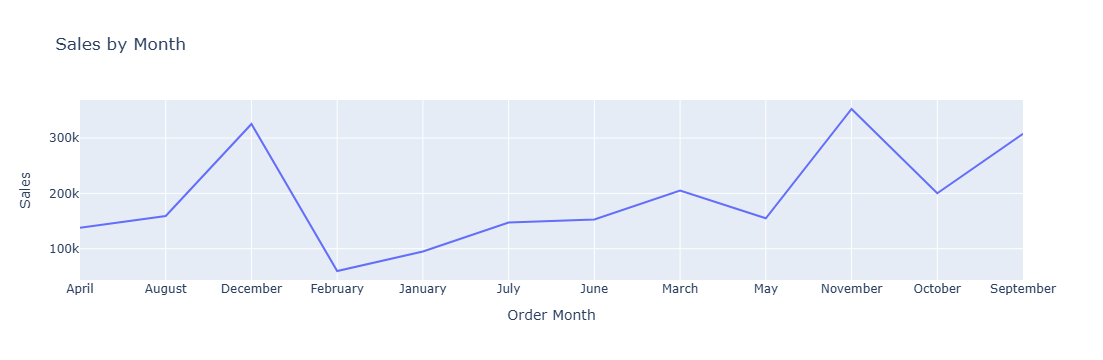

In [66]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().round(2).reset_index()
fig = px.line(monthly_sales, 
        x = 'Order Month', 
        y = 'Sales',
       title = 'Sales by Month')

fig.show()

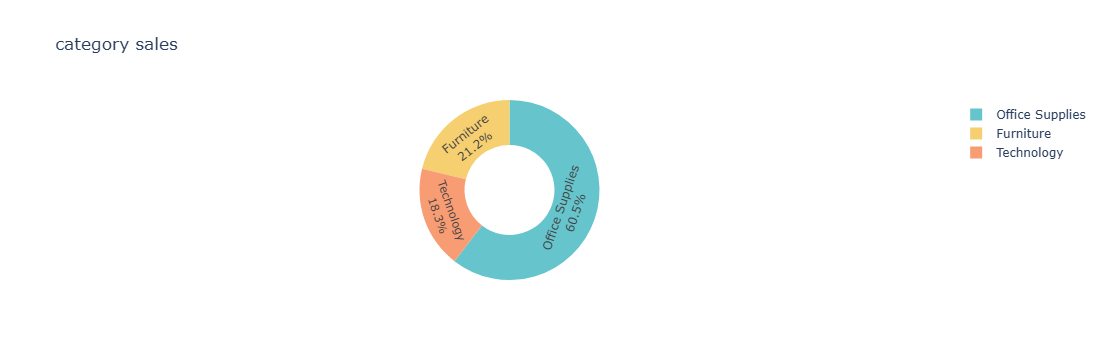

In [70]:
category_sales = df.groupby('Category')['Quantity'].sum().round(2).reset_index()

fig = px.pie(category_sales, 
             values='Quantity', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence = px.colors.qualitative.Pastel,
            title = 'category sales')

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.show()

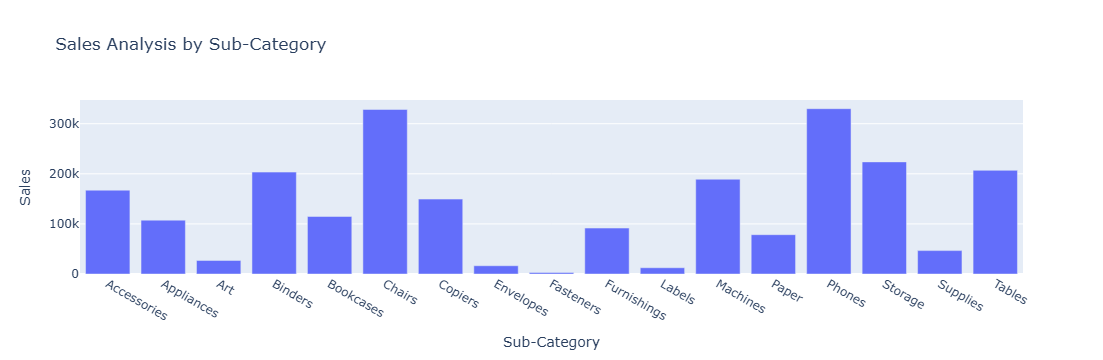

In [72]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().round(2).reset_index()

fig = px.bar(subcat_sales, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

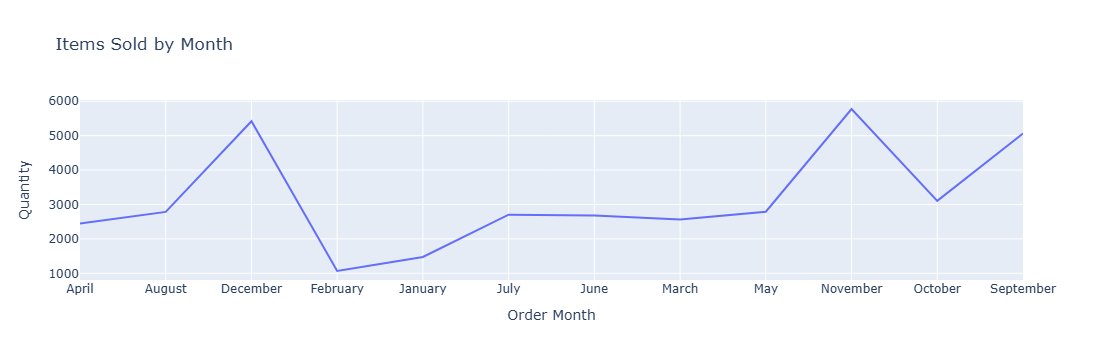

In [74]:
items_by_month = df.groupby('Order Month')['Quantity'].sum().round(2).reset_index()
fig = px.line(items_by_month, 
              x='Order Month', 
              y='Quantity', 
              title='Items Sold by Month')
fig.show()

## Predictive Modeling

In [99]:
# Step 3: Define features (X) and target variables (y)
X = df.select_dtypes(include=[np.number]).drop(columns=['Sales', 'Profit'], errors='ignore')
y_sales = df['Sales']
y_profit = df['Profit']

In [100]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_sales_train, y_sales_test = train_test_split(X, y_sales, test_size=0.2, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)


In [101]:
# Step 5: Train Linear Regression models
sales_model = LinearRegression()
profit_model = LinearRegression()

sales_model.fit(X_train, y_sales_train)
profit_model.fit(X_train, y_profit_train)

LinearRegression()

In [102]:
# Step 6: Make predictions
y_sales_pred = sales_model.predict(X_test)
y_profit_pred = profit_model.predict(X_test)

In [106]:
# Step 7: Evaluate model performance
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Model Performance:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")

evaluate_model(y_sales_test, y_sales_pred, "Sales")
evaluate_model(y_profit_test, y_profit_pred, "Profit")


Sales Model Performance:
MAE:  274.95
RMSE: 754.39
R²:   0.04

Profit Model Performance:
MAE:  73.39
RMSE: 212.56
R²:   0.07


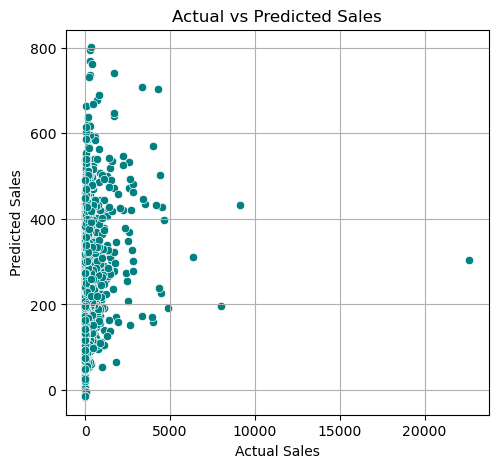

In [107]:
# Step 8: Visualization - Actual vs Predicted
plt.figure(figsize=(12,5))

# Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_sales_test, y=y_sales_pred, color='teal')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)

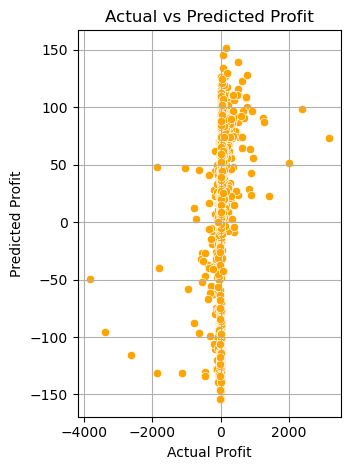

In [108]:
# Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_profit_test, y=y_profit_pred, color='orange')
plt.title("Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)

plt.tight_layout()
plt.show()

In [109]:
# Step 9: Optional - Display model coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Sales Coefficient': sales_model.coef_,
    'Profit Coefficient': profit_model.coef_
})
print("\nModel Coefficients:")
print(coeff_df.sort_values(by='Sales Coefficient', ascending=False))


Model Coefficients:
       Feature  Sales Coefficient  Profit Coefficient
2     Quantity          52.855682            7.212344
0       Row ID           0.002237            0.001511
1  Postal Code          -0.000391           -0.000152
4   Order Year          -0.350678            2.175712
3     Discount        -125.898213         -241.259047
